In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv("heart.csv")

In [27]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

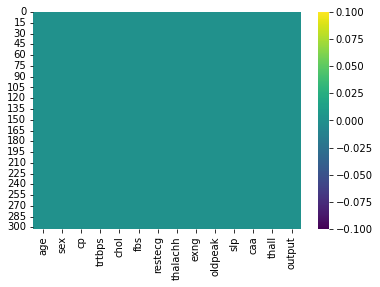

In [29]:
sns.heatmap(data.isnull(), cmap="viridis")

## Deep Learning Model

In [30]:
# Splitting Data
from sklearn.model_selection import train_test_split
X = data.drop("output", axis=1)
y = data["output"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Scaling Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train.shape

(242, 13)

In [33]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(100, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(50, activation="relu"))
model.add(Dropout(0.5))

# Binary Classification
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")

In [34]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          epochs=600,
          callbacks=[early_stop])

Epoch 1/600
8/8 [==============================] - 1s 21ms/step - loss: 0.6932 - val_loss: 0.6652
Epoch 2/600
8/8 [==============================] - 0s 4ms/step - loss: 0.6789 - val_loss: 0.6422
Epoch 3/600
8/8 [==============================] - 0s 4ms/step - loss: 0.6416 - val_loss: 0.6208
Epoch 4/600
8/8 [==============================] - 0s 5ms/step - loss: 0.6249 - val_loss: 0.5976
Epoch 5/600
8/8 [==============================] - 0s 4ms/step - loss: 0.5915 - val_loss: 0.5751
Epoch 6/600
8/8 [==============================] - 0s 4ms/step - loss: 0.5793 - val_loss: 0.5492
Epoch 7/600
8/8 [==============================] - 0s 5ms/step - loss: 0.5904 - val_loss: 0.5242
Epoch 8/600
8/8 [==============================] - 0s 4ms/step - loss: 0.5498 - val_loss: 0.5027
Epoch 9/600
8/8 [==============================] - 0s 4ms/step - loss: 0.5432 - val_loss: 0.4800
Epoch 10/600
8/8 [==============================] - 0s 5ms/step - loss: 0.5115 - val_loss: 0.4585
Epoch 11/600
8/8 [==========

<AxesSubplot:>

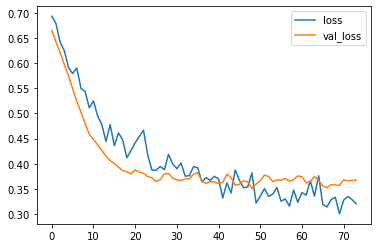

In [35]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [36]:
predictions = (model.predict(X_test) > 0.5)*1

2/2 [==============================] - 0s 996us/step


In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print()
print(classification_report(y_test, predictions))

[[26  3]
 [ 4 28]]

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



## Logistic Regression

In [38]:
X = data.drop("output", axis=1)
y = data["output"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)

In [40]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [41]:
predictions2 = logmodel.predict(X_test)

In [42]:
print(confusion_matrix(y_test, predictions2))
print()
print(classification_report(y_test, predictions2))

[[25  4]
 [ 4 28]]

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

